# Analyse Exploratoire et Nettoyage des Données - Challenge "Végétalisons la ville" de Paris


## Contexte et Présentation

Je suis un expert indépendant en intelligence artificielle et j'aime relever des défis en Data Science pour continuer à apprendre et à m'améliorer. Récemment, j'ai découvert l'ONG **Data is for Good**, qui organise des concours sur des sujets ayant un impact positif sur la société. 

Pour ce challenge, j'ai décidé de travailler sur le projet proposé par la **ville de Paris**. Le but est d'analyser un jeu de données concernant les arbres de la ville dans le cadre du programme **"Végétalisons la ville"**. Mon analyse vise à aider à optimiser les tournées d’entretien des arbres, ce qui permettrait de réduire les trajets et d'améliorer la gestion des espaces verts de Paris.

**Les données :**  
Le jeu de données provient d'OpenDataParis -> opendata.paris.fr et contient des informations sur les arbres, telles que leur hauteur, leur circonférence, leur emplacement, leur genre, leur variété et leur espèce.

**Mes objectifs pour ce challenge :**
- Comprendre la structure et les caractéristiques du jeu de données.
- Nettoyer les données en supprimant les colonnes inutiles et en traitant les valeurs aberrantes.
- Analyser chaque variable pour en extraire les indicateurs clés (moyenne, médiane, écart-type, etc.) et créer des visualisations claires.
- Identifier des pistes pour optimiser les tournées d’entretien et réduire les coûts.


## 1. Introduction et Objectifs

### Objectifs du Notebook

Dans ce Notebook, nous allons :
- Charger le jeu de données des arbres de Paris et obtenir une vision générale de sa structure.
- Nettoyer les données en supprimant les colonnes inutiles (colonnes vides, colonnes à valeur unique, identifiants non pertinents) et en traitant les valeurs aberrantes (ex. hauteur ou circonférence égales à 0, valeurs extrêmes).
- Réaliser une analyse univariée sur chaque variable afin d’en extraire les indicateurs clés (moyenne, médiane, écart-type, etc.) et d’effectuer des visualisations adaptées (histogrammes, boxplots, diagrammes en barres, pie charts).
- Explorer des pistes d’exploitation métier (optimisation des tournées, estimation des coûts d’entretien, etc.) ainsi qu’une visualisation géographique des arbres.


---


## 2. Chargement des Librairies et Importation des Données

### Chargement des Librairies et Importation du Jeu de Données

Nous commençons par importer les principales librairies (pandas, numpy, matplotlib, seaborn, missingno, folium, kepler) et charger le fichier CSV dans un DataFrame nommé *datacsv*. 
Nous vérifions ensuite la structure du DataFrame (nombre de lignes, colonnes, types, valeurs manquantes) afin de nous assurer que les données sont correctement importées.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import MarkerCluster
from keplergl import KeplerGl


# Lecture du fichier CSV en indiquant le séparateur (ici ';')
datacsv = pd.read_csv('p2-arbres-fr.csv', sep=';')

# Affichage des 8 premières lignes pour un aperçu du DataFrame
datacsv.head(8)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
5,99879,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0036,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890470,2.315228
6,99880,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0035,Arbre à miel,Tetradium,daniellii,NaN,37,0,NaN,NaN,48.890504,2.315168
7,99881,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,35,Platane,Platanus,x hispanica,NaN,260,17,NaN,NaN,48.876722,2.280222


#### Affichage des informations générales sur le DataFrame
- Le nombre de ligne total 
- le titre et le nombre de chaque colonne ainsi que leur type de variable 
- le nombre de cellules et ainsi les valeurs non-null enregistré en leur type

In [2]:
datacsv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

#### Affichage des statistiques descriptives pour les colonnes numériques

In [3]:
datacsv.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


#### Visualisation des valeurs manquantes avec missingno


<Axes: >

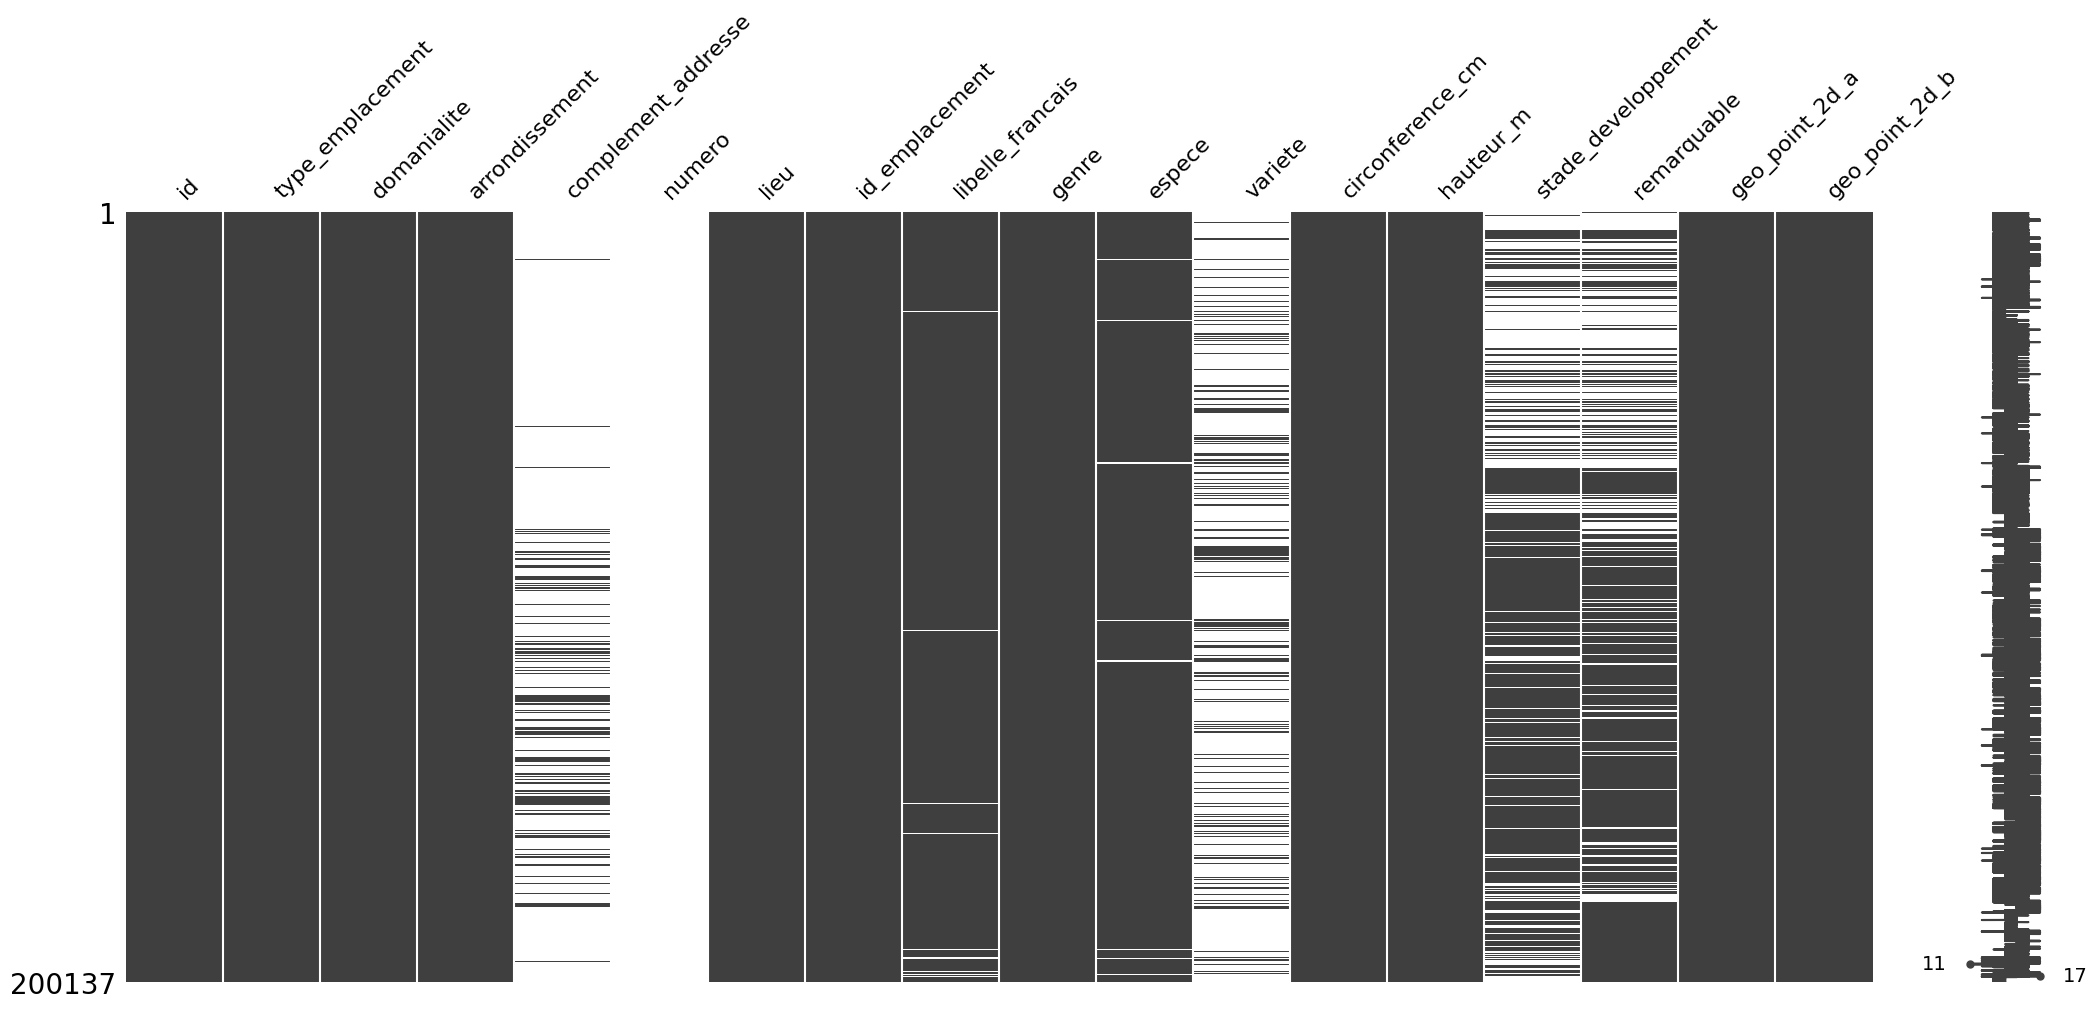

In [4]:
msno.matrix(datacsv)

<Axes: >

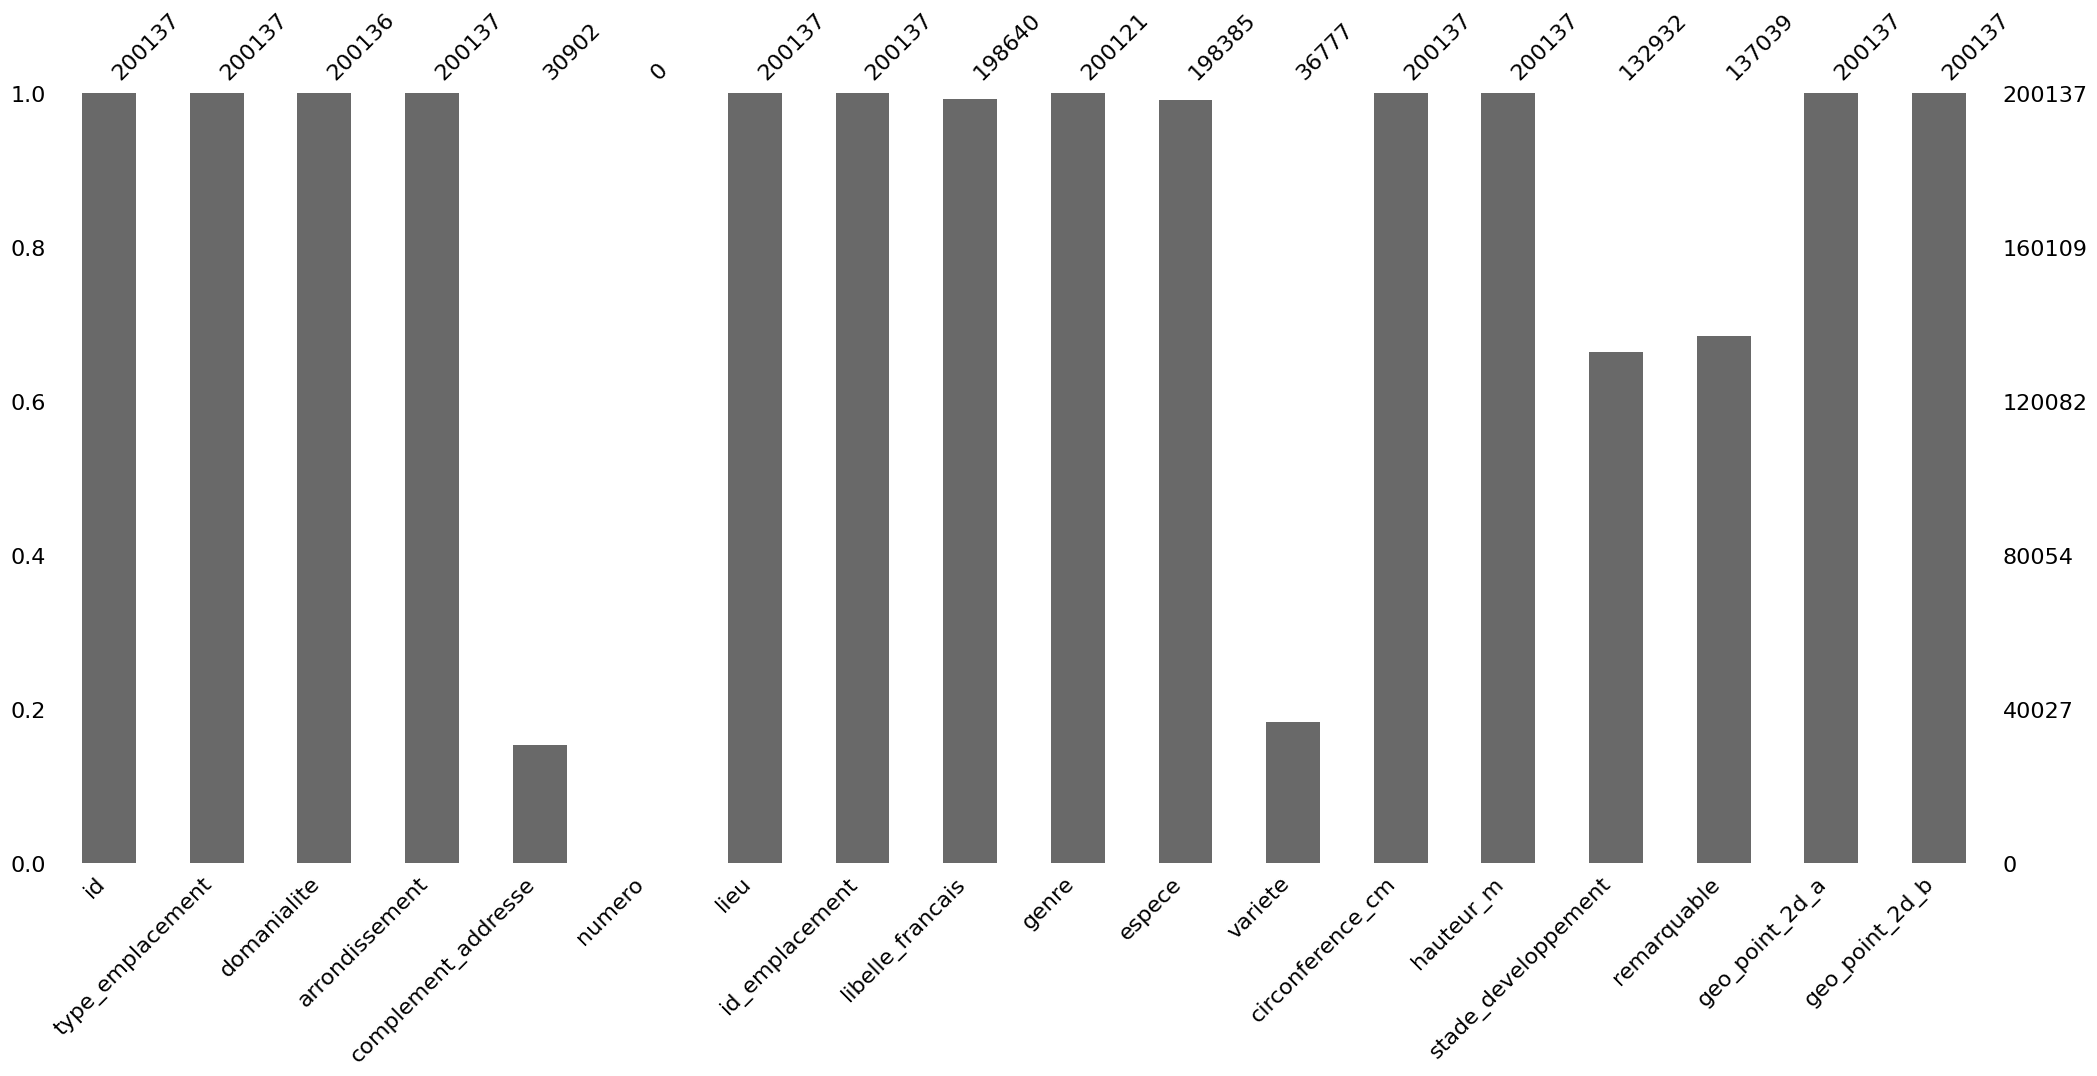

In [5]:
msno.bar(datacsv)

Calcul des colonnes avec le plus de valeurs manquantes

In [6]:
datacsv.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

## 3. Nettoyage des Données 

### Nettoyage des Données

Avant d'effectuer l'analyse univariée, il est crucial de nettoyer le jeu de données pour éliminer les informations inutiles ou erronées. 
Nous allons :
- Supprimer les colonnes inutiles (colonnes vides, colonnes avec une seul valeur unique, identifiants inutiles).
- Traiter les valeurs aberrantes, en remplaçant par NaN les valeurs de hauteur ou de circonférence égales ou inférieures à 0.
- Utiliser la méthode des interquartiles pour identifier et traiter les outliers.


### Suppression des Colonnes Inutiles

Grâce à la visualisation des valeurs manquantes avec missingno

In [7]:
# Suppression des colonnes entièrement vides
datacsv = datacsv.dropna(axis=1, how='all')

# Identification des colonnes avec une seule valeur
for col in datacsv.columns:
    if datacsv[col].nunique() <= 1:
        print(f"Colonne à valeur unique détectée : {col}")

Colonne à valeur unique détectée : type_emplacement


In [8]:
datacsv.type_emplacement.unique()

array(['Arbre'], dtype=object)

La colonne "type_emplacement" contient qu'une seule valeur : "arbre", ce qui en fait un intérèt faible dans notre étude 


In [9]:
# Suppression des colonnes 'type_emplacement' et 'id'
datacsv = datacsv.drop(columns=['type_emplacement', 'id'])

Vérification rapide après suppression

In [10]:
datacsv.head(3)

,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061


Vérification de la pertinence d'autre colonne avec UNIQUE

In [11]:
datacsv.arrondissement.unique()

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'VAL-DE-MARNE',
       'SEINE-SAINT-DENIS', 'HAUTS-DE-SEINE', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE BOULOGNE',
       'BOIS DE VINCENNES'], dtype=object)

In [12]:
datacsv.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

In [13]:
datacsv.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

Ces colonnes sont utiles à notre étude !

## Traitement des Valeurs Aberrantes

Certaines valeurs semblent aberrantes ou impossibles :
- Une hauteur ou une circonférence de 0 (ou négative) n'est pas réaliste, de même pour une hauteur de 800 000 ou une circonférence de 250 000.
- Nous utiliserons la méthode des interquartiles pour identifier les outliers. L'ajout d'une valeur MAX en manuel est requis, car certains arbres possèdent une hauteur supérieure réelle à ce que donne la méthode ... -> https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris

Valeurs fixées selon l'étude :
- Hauteur 42 m
- Circonférence 700 cm 


Visualisations des valeurs aberrantes ou impossibles :

<Axes: >

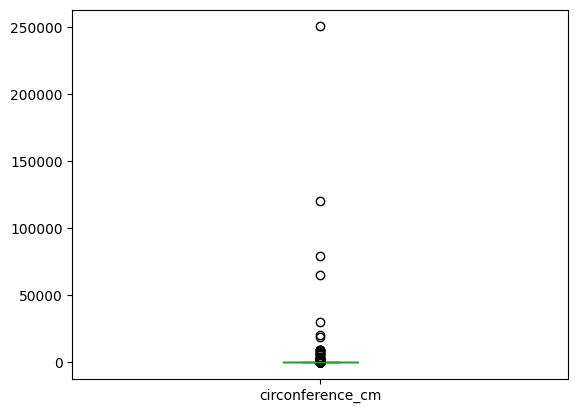

In [14]:
datacsv['circonference_cm'].plot.box() 

<Axes: >

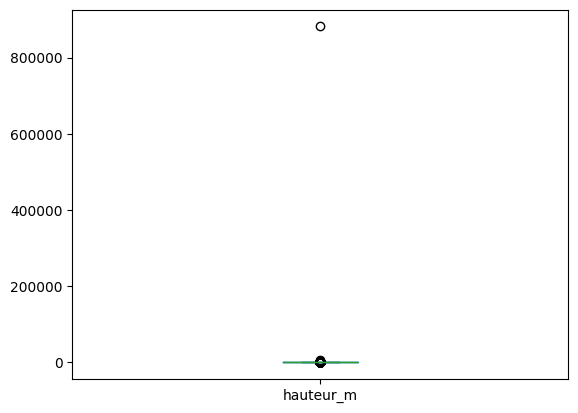

In [15]:
datacsv['hauteur_m'].plot.box()

In [16]:
# Fonction pour éliminer les outliers via la méthode des interquartiles
def remove_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound), np.nan)

# Remplacement des valeurs impossibles (≤ 0) par NaN (modification circonférence a 5 cm minimum (jeune arbre, baliveau ...))
datacsv['hauteur_m'] = datacsv['hauteur_m'].mask(datacsv['hauteur_m'] <= 0, np.nan)
datacsv['circonference_cm'] = datacsv['circonference_cm'].mask(datacsv['circonference_cm'] <= 5, np.nan)

# Appliquation de la méthode IQR pour détecter les outliers
remove_outliers_iqr(datacsv, 'hauteur_m', factor=8)
remove_outliers_iqr(datacsv, 'circonference_cm', factor=8)

# Seuil maximum
SEUIL_HAUTEUR_MAX = 38
SEUIL_CIRCONFERENCE_MAX = 700

# Remplacement par NaN des valeurs dépassant ces seuils
datacsv['hauteur_m'] = datacsv['hauteur_m'].mask(datacsv['hauteur_m'] > SEUIL_HAUTEUR_MAX, np.nan)
datacsv['circonference_cm'] = datacsv['circonference_cm'].mask(datacsv['circonference_cm'] > SEUIL_CIRCONFERENCE_MAX, np.nan)

# Vérification des statistiques après nettoyage pour hauteur et circonférence
datacsv[['hauteur_m', 'circonference_cm']].describe()


,hauteur_m,circonference_cm
count,160412.000000,174088.000000
mean,10.357349,91.495686
std,5.137166,58.833861
min,1.000000,6.000000
25%,6.000000,45.000000
50%,10.000000,80.000000
75%,14.000000,122.000000
max,38.000000,700.000000


Les résultats sont bien plus cohérents :

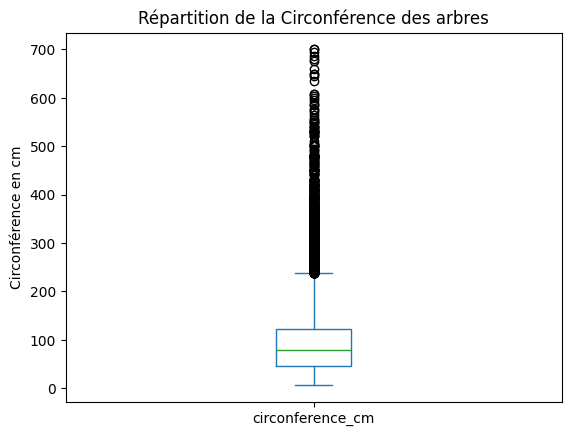

In [17]:
datacsv['circonference_cm'].plot.box() 
plt.title("Répartition de la Circonférence des arbres")
plt.ylabel("Circonférence en cm")
plt.show()

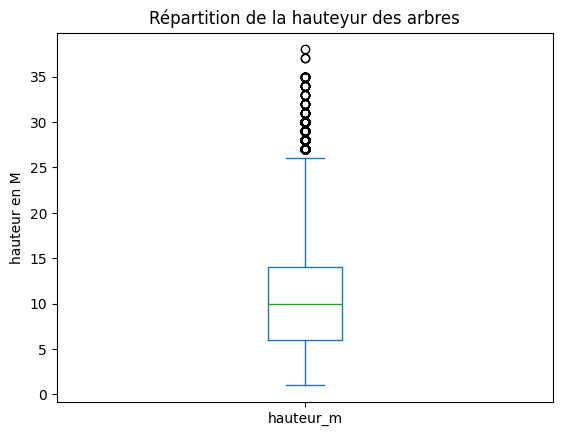

In [18]:
datacsv['hauteur_m'].plot.box()
plt.title("Répartition de la hauteyur des arbres")
plt.ylabel("hauteur en M")
plt.show()

## 4. Analyse Univariée

Dans cette section, nous allons examiner individuellement chaque variable :

- **Variables Quantitatives :** Nous calculerons les indicateurs statistiques (moyenne, médiane, écart-type, quartiles) et réaliserons des visualisations (histogrammes, boxplots) pour mieux comprendre leur distribution.
- **Variables Qualitatives :** Nous étudierons la répartition des catégories via des diagrammes en barres et des camemberts. Par exemple, nous analyserons la répartition par arrondissement, par type d'emplacement, et le top 10 des espèces.


### Variables Quantitatives

Statistiques descriptives pour la hauteur

In [19]:
datacsv['hauteur_m'].describe()

count    160412.000000
mean         10.357349
std           5.137166
min           1.000000
25%           6.000000
50%          10.000000
75%          14.000000
max          38.000000
Name: hauteur_m, dtype: float64

Histogramme de la hauteur

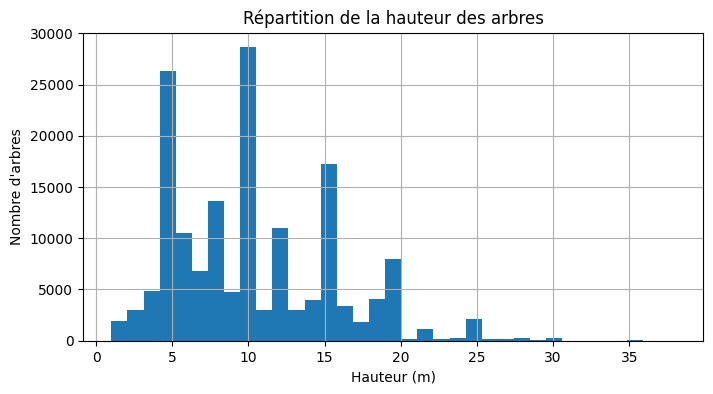

In [20]:
datacsv['hauteur_m'].hist(bins=35, figsize=(8,4))
plt.title("Répartition de la hauteur des arbres")
plt.xlabel("Hauteur (m)")
plt.ylabel("Nombre d'arbres")
plt.show()

Visu des valeurs hautes :

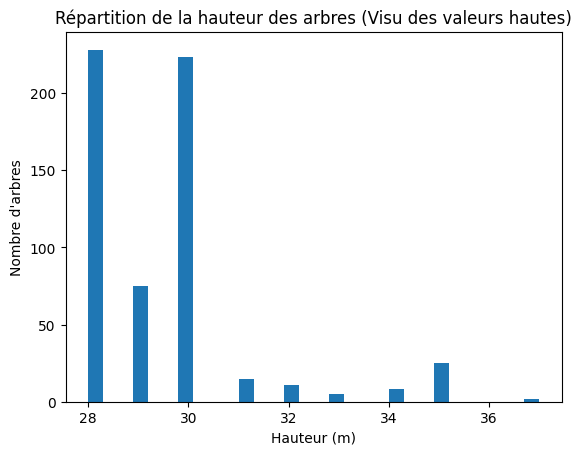

In [21]:
plt.hist(datacsv['hauteur_m'].dropna(), bins=30, range=(28, 37))
plt.title("Répartition de la hauteur des arbres (Visu des valeurs hautes)")
plt.xlabel("Hauteur (m)")
plt.ylabel("Nombre d'arbres")
plt.show()

Boxplot de la hauteur

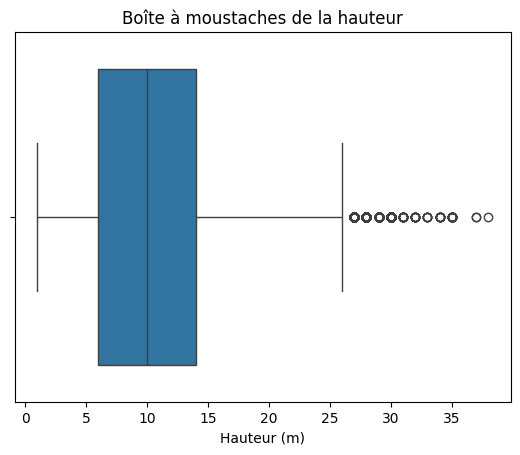

In [22]:
sns.boxplot(x=datacsv['hauteur_m'])
plt.title("Boîte à moustaches de la hauteur")
plt.xlabel("Hauteur (m)")
plt.show()

Statistiques descriptives pour la circonférence

In [23]:
datacsv['circonference_cm'].describe()

count    174088.000000
mean         91.495686
std          58.833861
min           6.000000
25%          45.000000
50%          80.000000
75%         122.000000
max         700.000000
Name: circonference_cm, dtype: float64

Histogramme de la circonférence

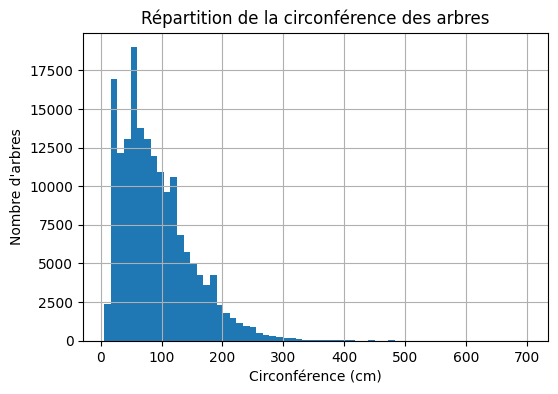

In [24]:
datacsv['circonference_cm'].hist(bins=64, figsize=(6,4))
plt.title("Répartition de la circonférence des arbres")
plt.xlabel("Circonférence (cm)")
plt.ylabel("Nombre d'arbres")
plt.show()

Visu des valeurs hautes :

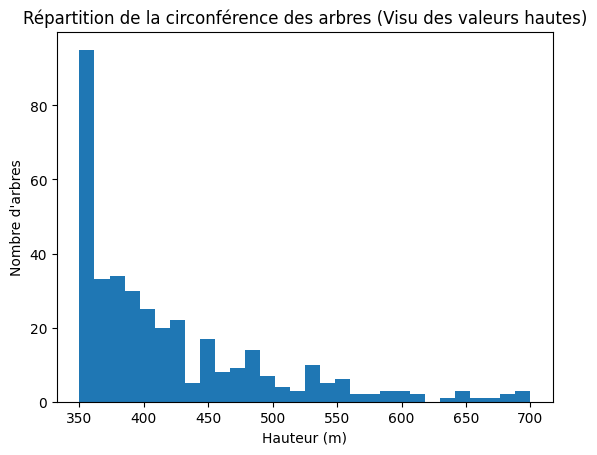

In [25]:
plt.hist(datacsv['circonference_cm'].dropna(), bins=30, range=(350, 700))
plt.title("Répartition de la circonférence des arbres (Visu des valeurs hautes)")
plt.xlabel("Hauteur (m)")
plt.ylabel("Nombre d'arbres")
plt.show()

Boxplot de la circonférence

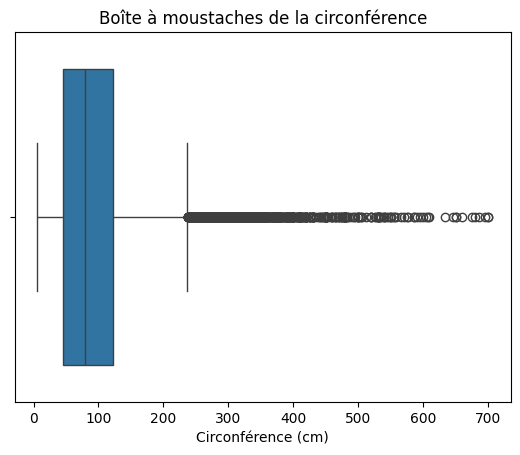

In [26]:
sns.boxplot(x=datacsv['circonference_cm'])
plt.title("Boîte à moustaches de la circonférence")
plt.xlabel("Circonférence (cm)")
plt.show()

---

## Variables Qualitatives

Répartition par Arrondissement

In [27]:
arr_counts = datacsv['arrondissement'].value_counts(dropna=True)
arr_counts

arrondissement
PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: count, dtype: int64

Diagramme en barres des effectifs par arrondissement

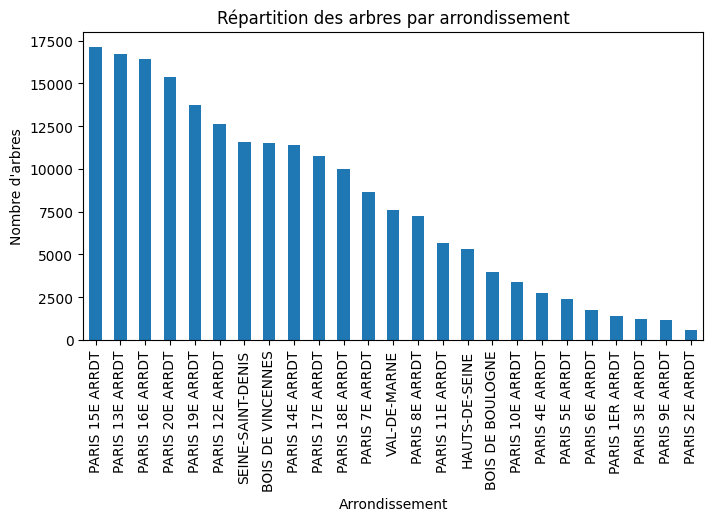

In [28]:
arr_counts.plot.bar(figsize=(8,4))
plt.title("Répartition des arbres par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")
plt.show()

Calcul et abnalyse des effectifs par arrondissement
- Affichage en TOP 10 :

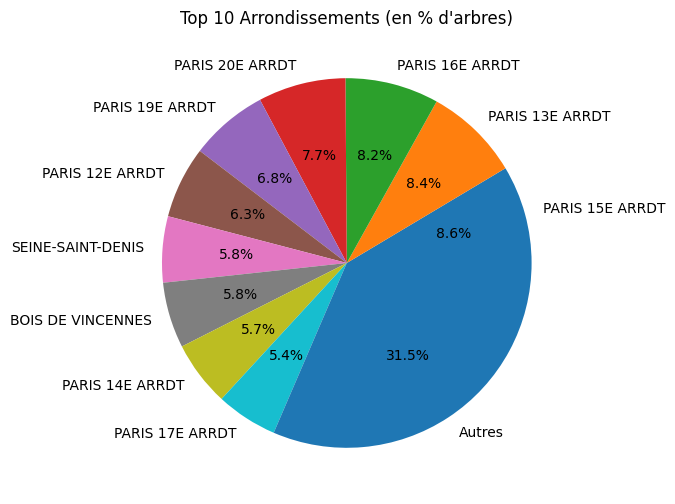

In [29]:
arr_counts = datacsv['arrondissement'].value_counts()
top_10 = arr_counts.iloc[:10]
others = arr_counts.iloc[10:].sum()
top_10['Autres'] = others

top_10.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 10 Arrondissements (en % d'arbres)")
plt.ylabel("")
plt.show()


Analyse des arbres **Remarquable** (valeur binaire ici : 1 ou 0, au final l'arbre est remarquable ou il ne l'ai pas) 

In [30]:
rem_counts = datacsv['remarquable'].value_counts(dropna=True)
rem_counts

remarquable
0.0    136855
1.0       184
Name: count, dtype: int64

Seulement 184 de remarquables, 136855 de non remarquables et le reste en null.

Analyse des différents stades de développement

In [31]:
stade_counts = datacsv['stade_developpement'].value_counts(dropna=True)
stade_counts

stade_developpement
A     64438
JA    35444
J     26937
M      6113
Name: count, dtype: int64

Diagramme en barres pour les différents stades de développement

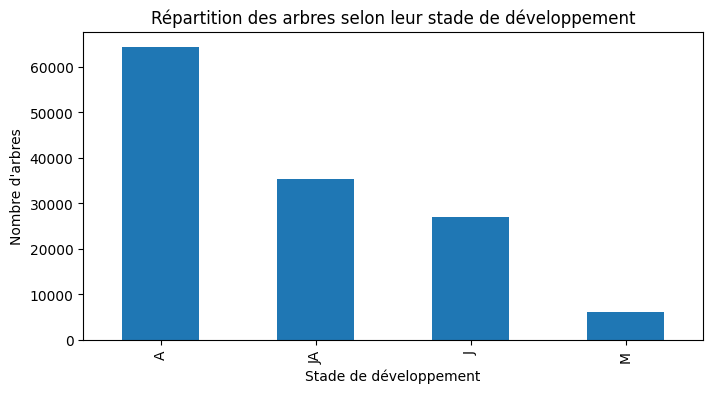

In [32]:
stade_counts.plot.bar(figsize=(8,4))
plt.title("Répartition des arbres selon leur stade de développement")
plt.xlabel("Stade de développement")
plt.ylabel("Nombre d'arbres")
plt.show()

Répartition des arbres en pourcentage selon les différents stades de développement

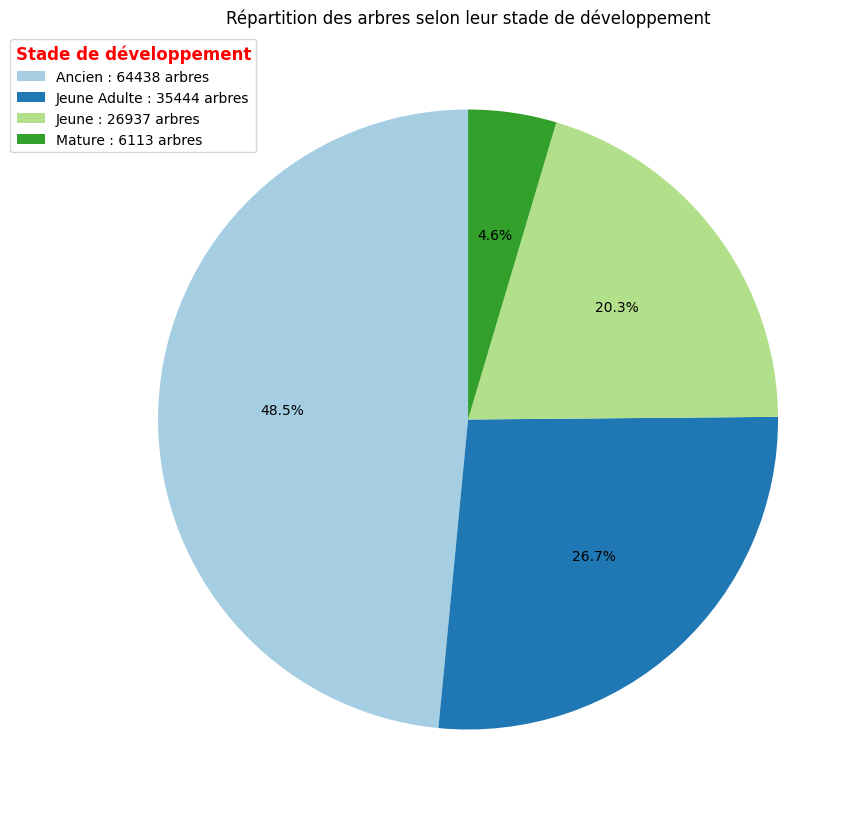

In [33]:
rename_mapping = {
    'a': 'Ancien',
    'A': 'Ancien',
    'j': 'Jeune',
    'J': 'Jeune',
    'M': 'Mature',
    'm': 'Mature',
    'JA': 'Jeune Adulte',
    'ja': 'Jeune Adulte'

}

datacsv['stade_developpement_renamed'] = datacsv['stade_developpement'].map(rename_mapping).fillna(datacsv['stade_developpement'])

stade_counts = datacsv['stade_developpement_renamed'].value_counts()

fig, ax = plt.subplots(figsize=(10,16))
patches, texts, autotexts = ax.pie(stade_counts, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

legend_labels = [f"{label} : {stade_counts[label]} arbres" for label in stade_counts.index]

legend = ax.legend(patches, legend_labels, title="Stade de développement",
                   loc="upper left", bbox_to_anchor=(-0.1, 1),
                   fontsize=10, title_fontsize=12, frameon=True)
plt.setp(legend.get_title(), color="red", fontweight="bold")

plt.title("Répartition des arbres selon leur stade de développement")
plt.show()


Analyse de la Domanialité

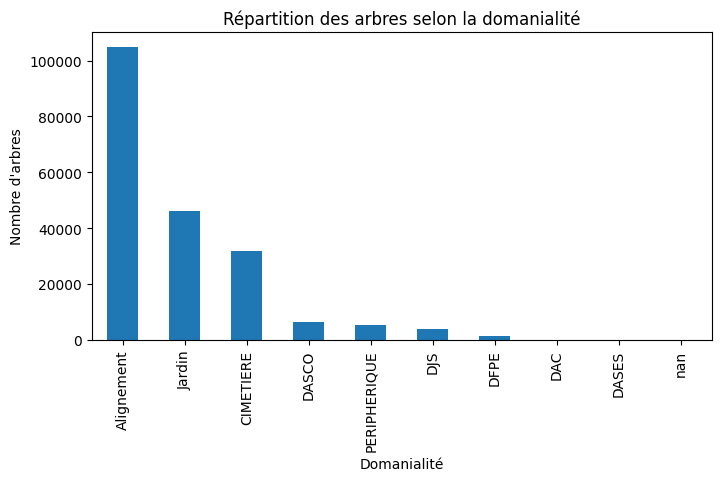

In [34]:
dom_counts = datacsv['domanialite'].value_counts(dropna=False)
dom_counts

dom_counts.plot.bar(figsize=(8,4))
plt.title("Répartition des arbres selon la domanialité")
plt.xlabel("Domanialité")
plt.ylabel("Nombre d'arbres")
plt.show()


La variable domanialite indique la propriété de l'arbre (par exemple, Cimetière, Jardin, alignement, Peripherique, etc.). 
Une analyse détaillée comme celle-ci permet d'identifier si certaines catégories prédominent et d'en déduire des recommandations pour la gestion en fonction des responsabilités de l'entretien.

Pourcentage de répartition :

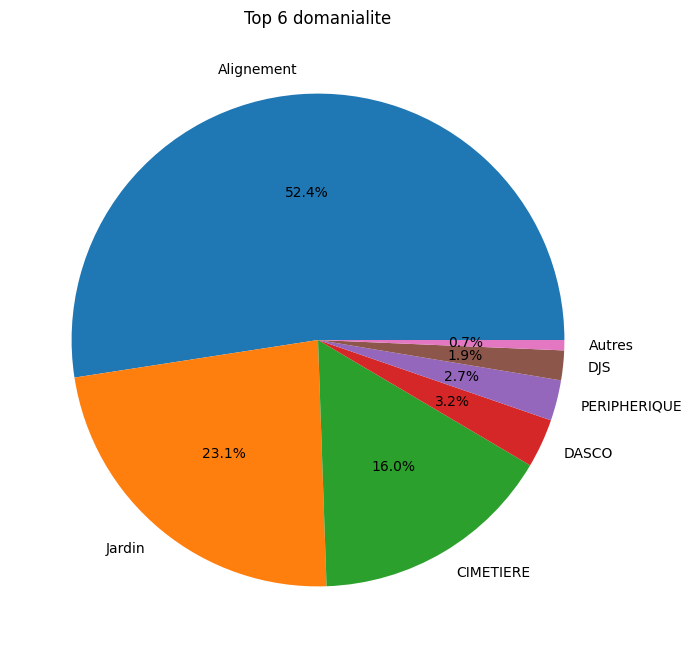

In [35]:
domanialite = datacsv['domanialite'].value_counts()
top_6 = domanialite.iloc[:6]
others = domanialite.iloc[6:].sum()
top_6['Autres'] = others


top_6.plot.pie(autopct='%3.1f%%', figsize=(8,8))
plt.title("Top 6 domanialite")
plt.ylabel("")
plt.show()

Top 10 des Espèces :

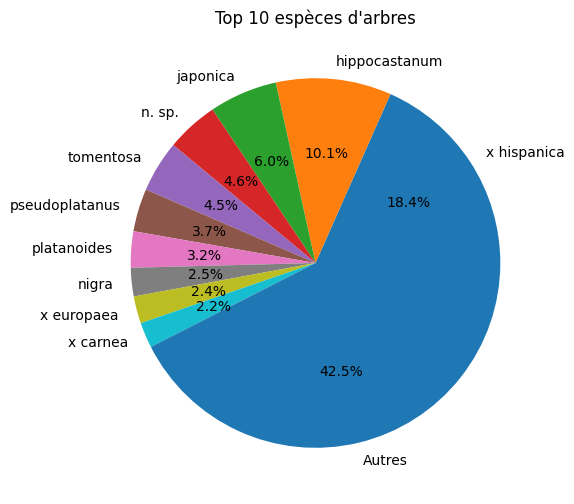

In [36]:
espece_counts = datacsv['espece'].value_counts()
top_10 = espece_counts.iloc[:10]
others = espece_counts.iloc[10:].sum()
top_10['Autres'] = others

top_10.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 10 espèces d'arbres")
plt.ylabel("")
plt.show()

Analyse des différents types d'arbres (libelle_francais)

In [37]:
libelle_counts = datacsv['libelle_francais'].value_counts(dropna=True)
libelle_counts.head(10)

libelle_francais
Platane              42508
Marronnier           25207
Tilleul              21305
Erable               18389
Sophora              11797
Frêne                 5171
Pin                   4844
Micocoulier           4201
Chêne                 3866
Cerisier à fleurs     3767
Name: count, dtype: int64

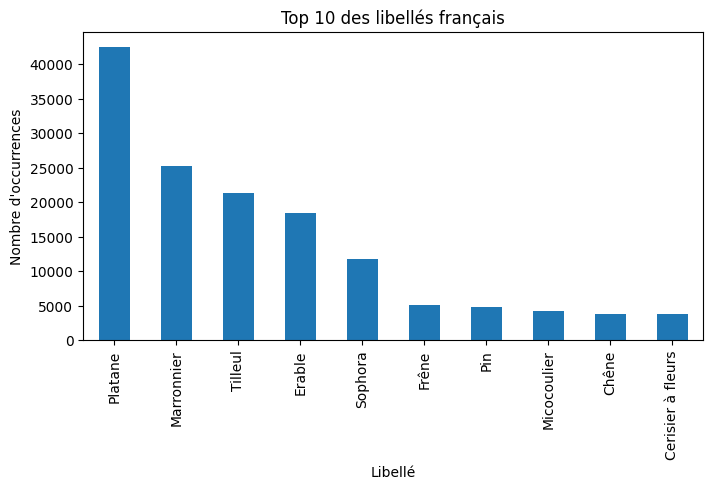

In [38]:
libelle_counts.head(10).plot.bar(figsize=(8,4))
plt.title("Top 10 des libellés français")
plt.xlabel("Libellé")
plt.ylabel("Nombre d'occurrences")
plt.show()

Pourcentage de répartition :

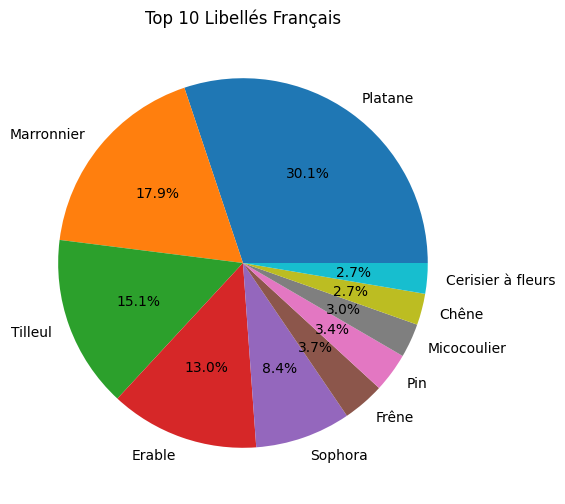

In [39]:
libelle_counts = datacsv['libelle_francais'].value_counts()
top_libelle = libelle_counts.head(10)
top_libelle.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 10 Libellés Français")
plt.ylabel("")
plt.show()


Top 10 des Genres d'Arbres :

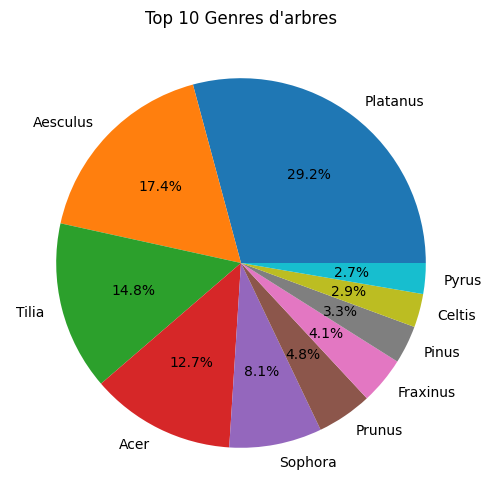

In [40]:
genre_counts = datacsv['genre'].value_counts()
top_genre = genre_counts.head(10)
top_genre.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 10 Genres d'arbres")
plt.ylabel("")
plt.show()


---

## Croisement de Variables

Nuage de Points : Hauteur X Circonférence

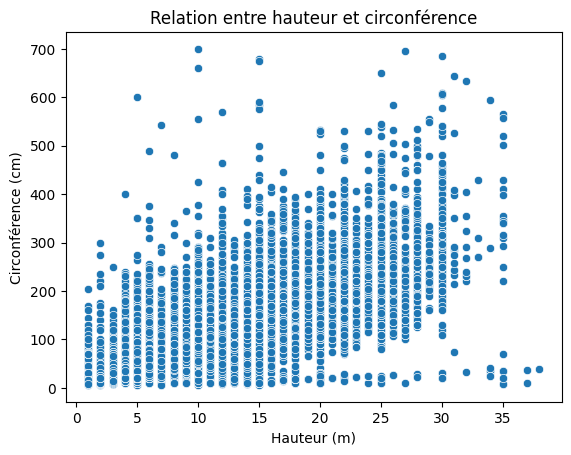

In [41]:
sns.scatterplot(data=datacsv, x='hauteur_m', y='circonference_cm')
plt.title("Relation entre hauteur et circonférence")
plt.xlabel("Hauteur (m)")
plt.ylabel("Circonférence (cm)")
plt.show()


Détection du type d'arbre le plus fréquent et calcul de la répartition par arrondissement

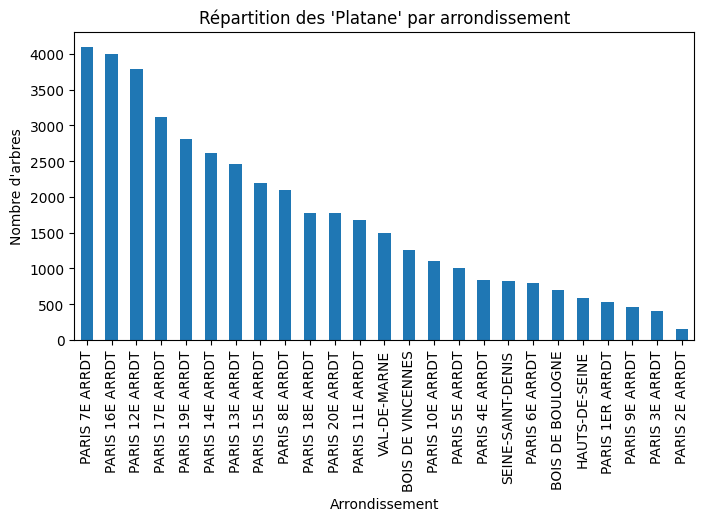

In [42]:
top = datacsv['libelle_francais'].value_counts().index[0]
subset_species = datacsv[datacsv['libelle_francais'] == top]


species_arr_counts = subset_species['arrondissement'].value_counts()
species_arr_counts.plot.bar(figsize=(8,4))
plt.title(f"Répartition des '{top}' par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")
plt.show()


Hauteur des Arbres en Fonction du Stade de Développement :

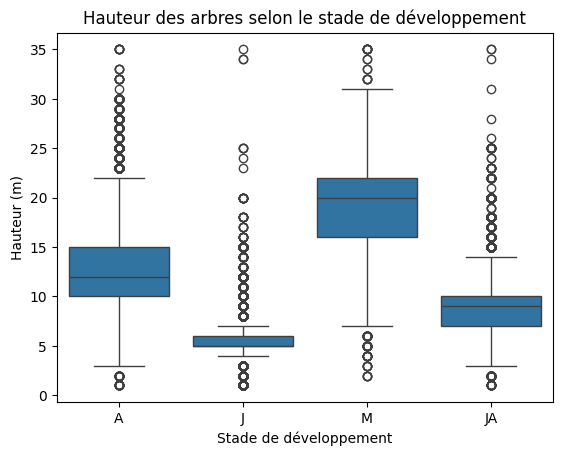

In [43]:
sns.boxplot(x='stade_developpement', y='hauteur_m', data=datacsv)
plt.title("Hauteur des arbres selon le stade de développement")
plt.xlabel("Stade de développement")
plt.ylabel("Hauteur (m)")
plt.show()


Croisement : Hauteur × Circonférence × Maturité (Stade_developpement)

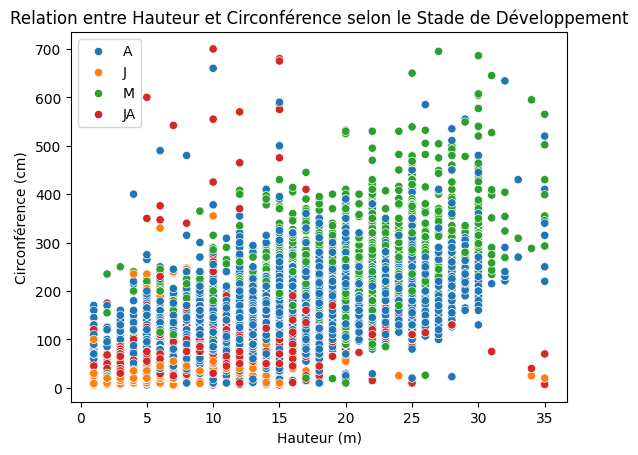

In [44]:
sns.scatterplot(
    data=datacsv, 
    x='hauteur_m', 
    y='circonference_cm', 
    hue='stade_developpement', 
)
plt.title("Relation entre Hauteur et Circonférence selon le Stade de Développement")
plt.xlabel("Hauteur (m)")
plt.ylabel("Circonférence (cm)")
plt.legend(loc="upper left")
plt.show()


Croisement : Hauteur × Circonférence × Arbre Remarquable

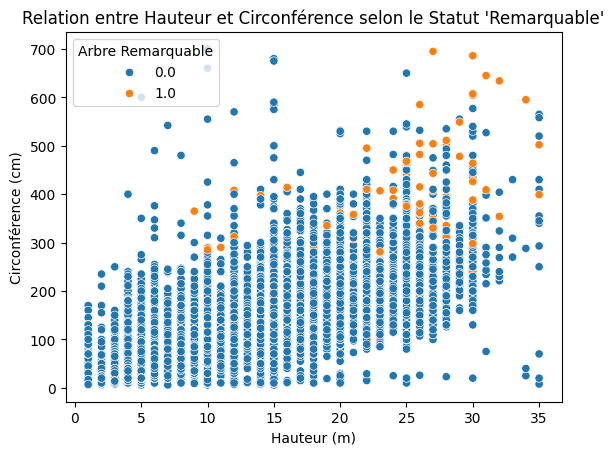

In [45]:
sns.scatterplot(
    data=datacsv, 
    x='hauteur_m', 
    y='circonference_cm', 
    hue='remarquable', 
)
plt.title("Relation entre Hauteur et Circonférence selon le Statut 'Remarquable'")
plt.xlabel("Hauteur (m)")
plt.ylabel("Circonférence (cm)")
plt.legend(title="Arbre Remarquable", loc="upper left")
plt.show()


---

## Visualisation Géographique

En utilisant Kepler et avec des paramètres personnalisés

In [47]:
datacsv = datacsv.rename(columns={
    "geo_point_2d_a": "latitude",
    "geo_point_2d_b": "longitude"
})

# Avec tooltip pour points personnalisé
config = {
    "version": "v1",
    "config": {
        "visState": {
            "layers": [
                {
                    "id": "tree_layer",
                    "type": "point",
                    "config": {
                        "dataId": "ArbresParis",
                        "label": "Arbres de Paris",
                        "color": [18, 147, 154],
                        "columns": {
                            "lat": "latitude",    
                            "lng": "longitude"     
                        },
                        "isVisible": True,
                        "visConfig": {
                            "radius": 2,          # Taille des points
                            "fixedRadius": False,
                            "opacity": 0.8,
                            "colorRange": {
                                "name": "Global Warming",
                                "type": "sequential",
                                "category": "Uber",
                                "colors": [
                                    "#5A1846",
                                    "#900C3F",
                                    "#C70039",
                                    "#E3611C",
                                    "#F1920E",
                                    "#FFC300"
                                ]
                            },
                            "radiusRange": [0, 50],
                            "strokeColor": None,
                            "strokeColorRange": {
                                "name": "Global Warming",
                                "type": "sequential",
                                "category": "Uber",
                                "colors": [
                                    "#5A1846",
                                    "#900C3F",
                                    "#C70039",
                                    "#E3611C",
                                    "#F1920E",
                                    "#FFC300"
                                ]
                            }
                        }
                    },
                    "visualChannels": {
                        "colorField": {
                            "name": "stade_developpement",
                            "type": "string"
                        },
                        "sizeField": None
                    }
                }
            ],
            "interactionConfig": {
                "tooltip": {
                    "fieldsToShow": {
                        "ArbresParis": [
                            "id",
                            "arrondissement",
                            "libelle_francais",
                            "lieu",
                            "genre",
                            "espece",
                            "variete",
                            "circonference_cm",
                            "hauteur_m",
                            "stade_developpement",
                            "remarquable"
                        ]
                    },
                    "enabled": True
                },
                "brush": {
                    "size": 0.5,
                    "enabled": False
                }
            },
            "layerBlending": "normal",
            "splitMaps": []
        },
        "mapState": {
            "bearing": 0,
            "dragRotate": False,
            # Centrage sur Paris
            "latitude": 48.8566,
            "longitude": 2.3522,
            "pitch": 0,
            "zoom": 11
        },
        "styleType": "customStyle",
            "mapStyles": {
                "customStyle": {
                    "name": "OpenStreetMap",
                    "accessToken": "",
                    "style": "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png"
            },
            "threeDBuildingColor": [9.665468314072013, 17.18305478057247, 31.1442867897876],
            "mapStyles": {}
        }
    }
}

map_1 = KeplerGl(height=600, config=config)
map_1.add_data(data=datacsv, name="ArbresParis")
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


c:\Users\Gui\Desktop\AAA_doc\Openclassroom school\Python project\proj_proj\proj2\env\Lib\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(config={'version': 'v1', 'config': {'visState': {'layers': [{'id': 'tree_layer', 'type': 'point', 'co…

### 5. Pistes d'Exploitation Métier

- **Optimisation des Tournées d'Entretien :**  
  En combinant l'analyse géographique (répartition par arrondissement et heatmap) et les caractéristiques des arbres (hauteur, circonférence, stade_developpement), il est possible de regrouper les interventions par zones et d'optimiser les itinéraires des équipes d'entretien.

- **Estimation des Coûts :**  
  Les dimensions des arbres (hauteur et circonférence) influencent le coût des interventions (élagage, abattage, etc.). En identifiant les outliers et en segmentant par type (domanialite, stade_developpement), on peut mieux estimer les budgets à allouer par secteur.

- **Priorisation des Interventions :**  
  La variable **remarquable** permet d'identifier les arbres nécessitant une attention particulière. Ces arbres, souvent situés dans des zones stratégiques (centres historiques, espaces publics), peuvent être priorisés pour l'entretien régulier.

- **Segmentation par Domanialité :**  
  L'analyse de la **domanialité** aide à distinguer les arbres appartenant à différentes entités. Cette segmentation est cruciale pour adapter les stratégies d'entretien et déterminer les responsabilités financières.

- **Analyse Croisée pour la Planification :**  
  En croisant les données sur la **maturité** (stade_developpement), les dimensions (hauteur, circonference_cm) et la localisation (arrondissement, dominialité), on peut anticiper les besoins en équipement et personnel pour chaque secteur de Paris.




### 6. Lexique

- **DataFrame :** Structure de données tabulaire utilisée par la bibliothèque pandas, où les données sont organisées en lignes et colonnes.
- **NaN (Not a Number) :** Valeur utilisée pour représenter des données manquantes ou non définies.
- **Outlier (Valeur Aberrante) :** Valeur statistiquement éloignée de la majorité des données, souvent le résultat d'une erreur de mesure ou d'un cas exceptionnel.
- **Boxplot (Boîte à Moustaches) :** Représentation graphique qui montre la distribution d'une variable par ses quartiles et permet de visualiser les outliers.
- **IQR (Interquartile Range) :** Différence entre le 3e et le 1er quartile, utilisée pour identifier les valeurs aberrantes.
- **Histogramme :** Graphique qui représente la distribution d'une variable quantitative en regroupant les données en intervalles.
- **Pie Chart (Camembert) :** Diagramme circulaire utilisé pour représenter la répartition en pourcentage des catégories d'une variable qualitative.
- **Scatter Plot (Nuage de Points) :** Graphique qui montre la relation entre deux variables quantitatives.
- **Heatmap :** Carte de chaleur qui visualise l'intensité d'une variable sur une zone géographique (par exemple, la densité d'arbres dans Paris).
- **Kepler.gl :** Outil de visualisation géospatiale interactif permettant de créer des cartes riches et personnalisées.
- **Domanialité :** Indique la propriété de l'arbre (ex. jardin, cimetière). Une variable essentielle pour comprendre la répartition des responsabilités d'entretien.
- **Libellé_francais :** Nom ou désignation en français de l'arbre, permettant d'identifier l'espèce de manière localisée.
- **Espece :** Catégorie biologique de l'arbre, essentielle pour analyser la diversité et la prédominance des variétés.
- **Genre :** Niveau taxonomique supérieur à l'espèce, utilisé pour regrouper plusieurs espèces apparentées.
- **Stade_developpement (Maturité) :** Indicateur du stade de croissance de l'arbre, permettant de déterminer son âge et son état d'évolution.
- **Remarquable :** Attribut indiquant si un arbre est considéré comme remarquable, souvent binaire (0 = non, 1 = oui), et susceptible d'une attention particulière.
